# Figure S7

In [1]:
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.stats as stats

from scipy.optimize import curve_fit
import pickle5 as pickle
from importlib import reload
import sys
import os
import seaborn as sns
sns.set_style("whitegrid")
from scipy import  optimize
# Import code
sys.path.insert(0, './../../DataAndScripts/structured_scripts/')


import functions_optimal as funopt
import functions as fun
import data_analysis as da
import sims_utils as su
import validate_utils as vu
import sims_analysis_utils as sau
import plot_functions_normalization as pl
import ricciardi_class as ric
import network as network
reload(vu)
reload(pl)

cwd=os.getcwd()
path2savedfits=cwd+'/generate_normalization_fits/'

/Users/agos/Dropbox/ColumbiaProjects/Code_Reshuffling_Github/2-SuppFigures/Supp_Figure_7_agos
/Users/agos/Dropbox/ColumbiaProjects/Code_Reshuffling_Github/2-SuppFigures/Supp_Figure_7_agos


# Load data

In [2]:
data=da.Data_MonkeyMouse('both','./../../DataAndScripts/experimental_data/')



# Load normalization fits

In [3]:

nameout_sim=path2savedfits+'/Normalization_Structured'
with open(nameout_sim+".pkl", 'rb') as handle_Structured:
    output_norm_str=pickle.load(handle_Structured)
        
nameout_data=path2savedfits+'/Normalization_data'
with open(nameout_data+".pkl", 'rb') as handle_data:
    output_norm_data=pickle.load(handle_data)
        
nameout_sim_uns=path2savedfits+'/Normalization_Unstructured'
with open(nameout_sim_uns+".pkl", 'rb') as handle_Unstructured:
    output_norm_unstr=pickle.load(handle_Unstructured)

# Plot cummulatives

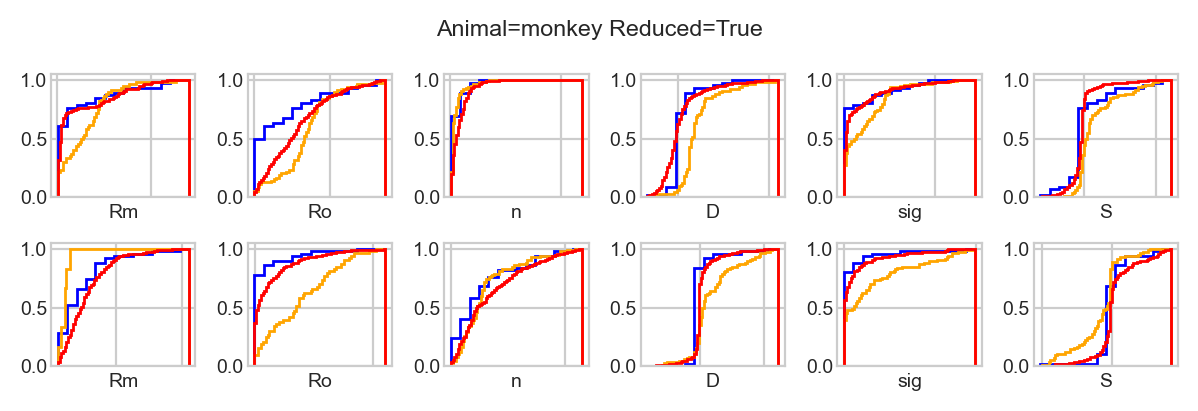

In [25]:
import matplotlib as mpl
# Define plotting style
font = {'family' : 'normal', 'weight' : 'normal', 'size' : 7, 'family' : 'serif', 'serif' : ['Arial']}
mpl.rc('font', **font)
mpl.rcParams['lines.linewidth'] = 1.0
mpl.rcParams['text.usetex'] = False
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['pdf.fonttype'] = 42



pars_names=['opto','Rm','Ro','n','m','D','sig','S']
pars_names_rdx=['Rm','Ro','n','D','sig','S']

error_str={}
error_unstr={}




for redux in [True]:
    if redux:
        pars_names=['Rm','Ro','n','D','sig','S']
    else:
        pars_names=['opto','Rm','Ro','n','m','D','sig','S']

    fig, axs = plt.subplots(2,len(pars_names), figsize=(len(pars_names),2), dpi=200, facecolor='w', edgecolor='k',sharex=False, sharey='col')
    fig.subplots_adjust(hspace =0.1, wspace=0.5)

    for animal, animal_idx in zip(data.this_animals,range(2)):


        name_out='Animal='+animal+'_Reduced='+str(redux)
        pars_nr=len(output_norm_data['all_pars_'+name_out][0])
        
        fig.suptitle('Animal='+animal+' Reduced='+str(redux))
        

        error_str[name_out]=np.zeros(pars_nr)
        error_unstr[name_out]=np.zeros(pars_nr)

        
        for k in range(pars_nr):
            lb=np.percentile(output_norm_data['all_pars_'+name_out][:,k],2)
            ub=np.percentile(output_norm_data['all_pars_'+name_out][:,k],95)
            bins=np.linspace(lb,ub,15)

            axs[animal_idx,k].hist(output_norm_data['all_pars_'+name_out][:,k],bins,density=True,histtype='step',
                           cumulative=True, color='blue',edgecolor='blue')
            axs[animal_idx,k].set_xticklabels([])
            axs[animal_idx,k].tick_params(axis='both', which='major', pad=-2) 

            bins=np.linspace(lb,ub,80)

            axs[animal_idx,k].hist(output_norm_str['all_pars_'+name_out][:,k],bins,density=True,histtype='step',
                           cumulative=True, color='orange',edgecolor='orange')
            axs[animal_idx,k].set_xticklabels([])
            axs[animal_idx,k].tick_params(axis='both', which='major', pad=-2) 

            bins=np.linspace(lb,ub,80)

            axs[animal_idx,k].hist(output_norm_unstr['all_pars_'+name_out][:,k],bins,density=True,histtype='step',
                           cumulative=True, color='red',edgecolor='red')
            axs[animal_idx,k].set_xlabel(pars_names[k], labelpad=1)
            axs[animal_idx,k].tick_params(axis='both', which='major', pad=-2) 



#             Out_hist_data=plt.hist(output_norm_data['all_pars_'+name_out][:,k],bins,density=True,histtype='step',
#                        cumulative=True)


#             Out_hist_str=plt.hist(output_norm_str['all_pars_'+name_out][:,k],bins,density=True,histtype='step',
#                        cumulative=True)

#             Out_hist_unstr=plt.hist(output_norm_unstr['all_pars_'+name_out][:,k],bins,density=True,histtype='step',
#                        cumulative=True)

#             error_str[name_out][k]=np.sum(Out_hist_str[0]-Out_hist_data[0])/np.sum(Out_hist_data[0])
#             error_unstr[name_out][k]=np.sum(Out_hist_unstr[0]-Out_hist_data[0])/np.sum(Out_hist_data[0])



fig.tight_layout() 
nameout='./Figure_S7'
fig.savefig(nameout+'.pdf', bbox_inches='tight')





